# Executive Summary

## About the Dataset

    * I used Pima Indian Diabetes dataset from Kaggle. 
    * There are 768 people data and 9 characteristics which is one of them classification column. 

## Data Preprocessing

    * There are no missing values. 
    * I used Min-Max Scaler to prevent the biased results. 
    * I splitted data 20% test 80% train. 
    * Also, I used Shuffle True, while dividing data.


## Build the Model

    * I built a neural network by using Tensorflow and Keras.
    * I used Sequential API while building my model.
    * At the begining of my analysis I implement three layers with one hidden layer. 
    * I used 15 perceptron the first layer and hidden layer. 
    * I defined 1 output layer. 
    * I stated ReLu activation function on the input and hidden layer, and sigmoid activation function on the output layer. 
    * I used Adam as a optimizer and, Binary Crossentropy for loss, and accuracy metric. I used 1000 epoch and 57 batch size.

## Evaluate the Model
    * Unfortunately, my model caused over-fitting. 
    * The model had a high accuracy on the train dataset, however had a low accuracy on the test dataset.
    * Firstly, To prevent the overfitting, I decrease epoch size from 1000 to 500. But it couldn't work.
    * Secondly, I decrease batch size  from 57 to 16. I reached the same result.
    * Thirdly, I added Dropout Layer with 0.2 dropout rate.
    * Finally, I can reach reliable and aceptable model acuracy both of them (train, test dataset) which train accuracy was 0.79 and test accuracy was .77.
    * I added the plot of the train and test loss and accuracy at the end of the project.


# Import the Libraries

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report

# Import the Dataset

In [3]:
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.shape

(768, 9)

In [5]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
#Convert the dataset to the array
dataset = data.values
dataset

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

# Split the dataset

In [5]:
X = dataset[:,0:8]
y = dataset[:,-1]

# Normalize the data

In [6]:
min_max_ss = MinMaxScaler()
X_scale = min_max_ss.fit_transform(X)
X_scale

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, shuffle=True, random_state=42)

# Build a model

In [36]:
model = Sequential([
    Dense(128, activation = 'relu', input_shape=(8,)),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(16, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

In [37]:
model.compile(optimizer='adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy']
             )

# Train the model

In [38]:
hist = model.fit(X_train, y_train, 
                 batch_size= 16,
                 epochs=500,
                 validation_split=0.2)

Epoch 1/500
31/31 [==============================] - 1s 7ms/step - loss: 1.8592 - accuracy: 0.5845 - val_loss: 0.6816 - val_accuracy: 0.6667
Epoch 2/500
31/31 [==============================] - 0s 3ms/step - loss: 0.8679 - accuracy: 0.5723 - val_loss: 0.6966 - val_accuracy: 0.6179
Epoch 3/500
31/31 [==============================] - 0s 3ms/step - loss: 0.7753 - accuracy: 0.5662 - val_loss: 0.6613 - val_accuracy: 0.6667
Epoch 4/500
31/31 [==============================] - 0s 3ms/step - loss: 0.6950 - accuracy: 0.5967 - val_loss: 0.6758 - val_accuracy: 0.6098
Epoch 5/500
31/31 [==============================] - 0s 3ms/step - loss: 0.7237 - accuracy: 0.6578 - val_loss: 0.6703 - val_accuracy: 0.6098
Epoch 6/500
31/31 [==============================] - 0s 3ms/step - loss: 0.6720 - accuracy: 0.6395 - val_loss: 0.6440 - val_accuracy: 0.7073
Epoch 7/500
31/31 [==============================] - 0s 3ms/step - loss: 0.6673 - accuracy: 0.6354 - val_loss: 0.6473 - val_accuracy: 0.6098
Epoch 8/500
3

Epoch 59/500
31/31 [==============================] - 0s 3ms/step - loss: 0.5782 - accuracy: 0.7088 - val_loss: 0.6165 - val_accuracy: 0.6504
Epoch 60/500
31/31 [==============================] - 0s 3ms/step - loss: 0.5730 - accuracy: 0.6802 - val_loss: 0.6098 - val_accuracy: 0.6423
Epoch 61/500
31/31 [==============================] - 0s 3ms/step - loss: 0.5870 - accuracy: 0.7047 - val_loss: 0.5942 - val_accuracy: 0.6341
Epoch 62/500
31/31 [==============================] - 0s 3ms/step - loss: 0.5729 - accuracy: 0.6986 - val_loss: 0.5923 - val_accuracy: 0.6423
Epoch 63/500
31/31 [==============================] - 0s 3ms/step - loss: 0.5767 - accuracy: 0.6986 - val_loss: 0.6012 - val_accuracy: 0.6423
Epoch 64/500
31/31 [==============================] - 0s 3ms/step - loss: 0.5654 - accuracy: 0.7149 - val_loss: 0.6110 - val_accuracy: 0.6341
Epoch 65/500
31/31 [==============================] - 0s 3ms/step - loss: 0.5764 - accuracy: 0.6986 - val_loss: 0.5899 - val_accuracy: 0.6585
Epoch 

31/31 [==============================] - 0s 2ms/step - loss: 0.5536 - accuracy: 0.7169 - val_loss: 0.5786 - val_accuracy: 0.7317
Epoch 117/500
31/31 [==============================] - 0s 2ms/step - loss: 0.5290 - accuracy: 0.7352 - val_loss: 0.5671 - val_accuracy: 0.6992
Epoch 118/500
31/31 [==============================] - 0s 2ms/step - loss: 0.5360 - accuracy: 0.7373 - val_loss: 0.5767 - val_accuracy: 0.7073
Epoch 119/500
31/31 [==============================] - 0s 2ms/step - loss: 0.5264 - accuracy: 0.7454 - val_loss: 0.5822 - val_accuracy: 0.6748
Epoch 120/500
31/31 [==============================] - 0s 2ms/step - loss: 0.5273 - accuracy: 0.7047 - val_loss: 0.5965 - val_accuracy: 0.6829
Epoch 121/500
31/31 [==============================] - 0s 2ms/step - loss: 0.5342 - accuracy: 0.7189 - val_loss: 0.5840 - val_accuracy: 0.6992
Epoch 122/500
31/31 [==============================] - 0s 2ms/step - loss: 0.5493 - accuracy: 0.6945 - val_loss: 0.5667 - val_accuracy: 0.6829
Epoch 123/500

31/31 [==============================] - 0s 2ms/step - loss: 0.4954 - accuracy: 0.7556 - val_loss: 0.5336 - val_accuracy: 0.7561
Epoch 174/500
31/31 [==============================] - 0s 2ms/step - loss: 0.5029 - accuracy: 0.7332 - val_loss: 0.5438 - val_accuracy: 0.7073
Epoch 175/500
31/31 [==============================] - 0s 2ms/step - loss: 0.4804 - accuracy: 0.7739 - val_loss: 0.5475 - val_accuracy: 0.7236
Epoch 176/500
31/31 [==============================] - 0s 2ms/step - loss: 0.4779 - accuracy: 0.7434 - val_loss: 0.5332 - val_accuracy: 0.7154
Epoch 177/500
31/31 [==============================] - 0s 2ms/step - loss: 0.4827 - accuracy: 0.7821 - val_loss: 0.5413 - val_accuracy: 0.7073
Epoch 178/500
31/31 [==============================] - 0s 3ms/step - loss: 0.4874 - accuracy: 0.7495 - val_loss: 0.5313 - val_accuracy: 0.6992
Epoch 179/500
31/31 [==============================] - 0s 3ms/step - loss: 0.4781 - accuracy: 0.7576 - val_loss: 0.5234 - val_accuracy: 0.7154
Epoch 180/500

31/31 [==============================] - 0s 3ms/step - loss: 0.4667 - accuracy: 0.7576 - val_loss: 0.5271 - val_accuracy: 0.7236
Epoch 231/500
31/31 [==============================] - 0s 2ms/step - loss: 0.4602 - accuracy: 0.7678 - val_loss: 0.5210 - val_accuracy: 0.7073
Epoch 232/500
31/31 [==============================] - 0s 2ms/step - loss: 0.4439 - accuracy: 0.7821 - val_loss: 0.5436 - val_accuracy: 0.7236
Epoch 233/500
31/31 [==============================] - 0s 3ms/step - loss: 0.4420 - accuracy: 0.7780 - val_loss: 0.5216 - val_accuracy: 0.7317
Epoch 234/500
31/31 [==============================] - 0s 2ms/step - loss: 0.4634 - accuracy: 0.7617 - val_loss: 0.5228 - val_accuracy: 0.7317
Epoch 235/500
31/31 [==============================] - 0s 3ms/step - loss: 0.4464 - accuracy: 0.8024 - val_loss: 0.5374 - val_accuracy: 0.7317
Epoch 236/500
31/31 [==============================] - 0s 5ms/step - loss: 0.4484 - accuracy: 0.7617 - val_loss: 0.5182 - val_accuracy: 0.7236
Epoch 237/500

31/31 [==============================] - 0s 4ms/step - loss: 0.4460 - accuracy: 0.7862 - val_loss: 0.5255 - val_accuracy: 0.7317
Epoch 288/500
31/31 [==============================] - 0s 5ms/step - loss: 0.4196 - accuracy: 0.7800 - val_loss: 0.5071 - val_accuracy: 0.7236
Epoch 289/500
31/31 [==============================] - 0s 6ms/step - loss: 0.4291 - accuracy: 0.7841 - val_loss: 0.5082 - val_accuracy: 0.7480
Epoch 290/500
31/31 [==============================] - 0s 4ms/step - loss: 0.4438 - accuracy: 0.7862 - val_loss: 0.5170 - val_accuracy: 0.7154
Epoch 291/500
31/31 [==============================] - 0s 4ms/step - loss: 0.4285 - accuracy: 0.8106 - val_loss: 0.5116 - val_accuracy: 0.7805
Epoch 292/500
31/31 [==============================] - 0s 4ms/step - loss: 0.4340 - accuracy: 0.7760 - val_loss: 0.4905 - val_accuracy: 0.7724
Epoch 293/500
31/31 [==============================] - 0s 3ms/step - loss: 0.4390 - accuracy: 0.7963 - val_loss: 0.5032 - val_accuracy: 0.7642
Epoch 294/500

31/31 [==============================] - 0s 2ms/step - loss: 0.4252 - accuracy: 0.8004 - val_loss: 0.5060 - val_accuracy: 0.7480
Epoch 345/500
31/31 [==============================] - 0s 2ms/step - loss: 0.4167 - accuracy: 0.8167 - val_loss: 0.5644 - val_accuracy: 0.7805
Epoch 346/500
31/31 [==============================] - 0s 2ms/step - loss: 0.4263 - accuracy: 0.7923 - val_loss: 0.5069 - val_accuracy: 0.7805
Epoch 347/500
31/31 [==============================] - 0s 2ms/step - loss: 0.4168 - accuracy: 0.8065 - val_loss: 0.5286 - val_accuracy: 0.7236
Epoch 348/500
31/31 [==============================] - 0s 2ms/step - loss: 0.3975 - accuracy: 0.8045 - val_loss: 0.5037 - val_accuracy: 0.7805
Epoch 349/500
31/31 [==============================] - 0s 2ms/step - loss: 0.3993 - accuracy: 0.8045 - val_loss: 0.5048 - val_accuracy: 0.7724
Epoch 350/500
31/31 [==============================] - 0s 2ms/step - loss: 0.3928 - accuracy: 0.8106 - val_loss: 0.5179 - val_accuracy: 0.7642
Epoch 351/500

31/31 [==============================] - 0s 2ms/step - loss: 0.3854 - accuracy: 0.8045 - val_loss: 0.4961 - val_accuracy: 0.7317
Epoch 402/500
31/31 [==============================] - 0s 2ms/step - loss: 0.4163 - accuracy: 0.7821 - val_loss: 0.4894 - val_accuracy: 0.7967
Epoch 403/500
31/31 [==============================] - 0s 2ms/step - loss: 0.3657 - accuracy: 0.8391 - val_loss: 0.5001 - val_accuracy: 0.7398
Epoch 404/500
31/31 [==============================] - 0s 2ms/step - loss: 0.4099 - accuracy: 0.8106 - val_loss: 0.5095 - val_accuracy: 0.7642
Epoch 405/500
31/31 [==============================] - 0s 2ms/step - loss: 0.4235 - accuracy: 0.7943 - val_loss: 0.4966 - val_accuracy: 0.7642
Epoch 406/500
31/31 [==============================] - 0s 2ms/step - loss: 0.3974 - accuracy: 0.8024 - val_loss: 0.5006 - val_accuracy: 0.7724
Epoch 407/500
31/31 [==============================] - 0s 2ms/step - loss: 0.4008 - accuracy: 0.8126 - val_loss: 0.5382 - val_accuracy: 0.7317
Epoch 408/500

31/31 [==============================] - 0s 2ms/step - loss: 0.4159 - accuracy: 0.7923 - val_loss: 0.5287 - val_accuracy: 0.7398
Epoch 459/500
31/31 [==============================] - 0s 2ms/step - loss: 0.3731 - accuracy: 0.8167 - val_loss: 0.5690 - val_accuracy: 0.7317
Epoch 460/500
31/31 [==============================] - 0s 2ms/step - loss: 0.3904 - accuracy: 0.7841 - val_loss: 0.5228 - val_accuracy: 0.7561
Epoch 461/500
31/31 [==============================] - 0s 2ms/step - loss: 0.3998 - accuracy: 0.8330 - val_loss: 0.5416 - val_accuracy: 0.7480
Epoch 462/500
31/31 [==============================] - 0s 2ms/step - loss: 0.3846 - accuracy: 0.8208 - val_loss: 0.5244 - val_accuracy: 0.7642
Epoch 463/500
31/31 [==============================] - 0s 2ms/step - loss: 0.3719 - accuracy: 0.8187 - val_loss: 0.5858 - val_accuracy: 0.7561
Epoch 464/500
31/31 [==============================] - 0s 2ms/step - loss: 0.3857 - accuracy: 0.8289 - val_loss: 0.5820 - val_accuracy: 0.7642
Epoch 465/500

# Evaluate the model

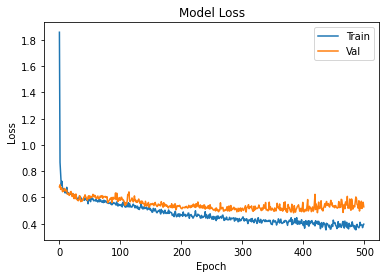

In [39]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'], loc = 'upper right')
plt.show()

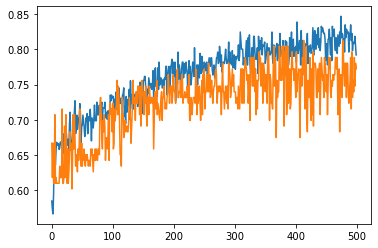

In [40]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.show()

In [41]:
y_pred = model.predict(X_test)
print(y_pred)

5/5 [==============================] - 0s 2ms/step
[[4.12153244e-01]
 [4.85184826e-02]
 [1.30894914e-01]
 [2.80647397e-01]
 [5.61643720e-01]
 [4.34713811e-01]
 [1.28209814e-01]
 [8.23998637e-03]
 [3.93111914e-01]
 [3.88994813e-01]
 [3.53465945e-01]
 [8.14092040e-01]
 [2.98175931e-01]
 [5.93790710e-01]
 [1.30399968e-02]
 [3.06437314e-01]
 [4.35073115e-03]
 [2.79357452e-02]
 [9.54615623e-02]
 [2.94464350e-01]
 [3.88867468e-01]
 [5.26800379e-03]
 [3.85734320e-01]
 [4.00081649e-02]
 [3.78791898e-01]
 [8.55079055e-01]
 [4.16878790e-01]
 [1.45574892e-03]
 [2.04649027e-02]
 [3.18966120e-01]
 [6.14274561e-01]
 [5.93035996e-01]
 [7.57956922e-01]
 [9.86998856e-01]
 [1.70980230e-01]
 [6.48050845e-01]
 [1.07807599e-01]
 [3.47939407e-04]
 [1.45176783e-01]
 [9.97535527e-01]
 [9.71088782e-02]
 [8.77736956e-02]
 [4.27892238e-01]
 [2.10732464e-02]
 [5.88117655e-06]
 [3.49763453e-01]
 [3.88109595e-01]
 [7.10067526e-02]
 [1.09013431e-01]
 [8.46883237e-01]
 [7.79487239e-03]
 [4.79782730e-01]
 [8.74500692e

In [42]:
y_pred = [1 if y>= 0.5 else 0 for y in y_pred]

In [43]:
y_pred

[0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0]

In [44]:
model.evaluate(X_test,y_test)[1]

5/5 [==============================] - 0s 1ms/step - loss: 0.9030 - accuracy: 0.7208


0.7207792401313782